In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


**Importing Standard Libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Required Libraries**

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score as ac
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay

**Importing Datasets**

In [4]:
train_data=pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
train_data.shape

(100000, 76)

In [5]:
test_data=pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
test_data.shape

(10000, 75)

**EDA and Data Visualization**

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [7]:
train_data.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.shape

(96695, 76)

In [10]:
#for numerical column
train_data.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,96695.0,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,...,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000,96695.000000
mean,0.0,6.847903,0.017757,47998.688381,1.327328,1.017736,0.998531,108.134299,80973.020591,169.809173,...,401.933730,32925.321475,0.498754,0.003175,0.129272,0.040985,0.058504,0.298599,7.874482,0.506427
std,0.0,1.016596,0.132067,13759.697263,0.521139,0.153374,0.038294,63.100303,48930.200727,89.168486,...,221.312123,21153.931102,0.500001,0.056257,0.335503,0.198255,0.234694,0.457646,4.565004,0.499961
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36674.500000,89.000000,...,142.000000,12993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122689.000000,267.000000,...,556.000000,52344.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [11]:
#for categorical column
train_data.describe(include="object")

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,...,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,96695,96695,96695,96695,96695,96695,96695,96695,96695,96695,...,96695,96695,96695,96695,96695,96695,96695,96695,96695,96695
unique,96530,2,36,64,2376,3,3,7,9,244,...,12,16,14,9,5,4,5,7,2342,109
top,44e7c525cab22be87dd2b28a34289cdb,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,96635,44082,60933,1257,95420,88310,95415,44683,41911,...,45747,38076,38076,31510,43823,87226,50271,91108,1257,20470


In [12]:
train_data

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,a378b2196a7a1d8ee0d4f989ee46730e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-21 00:59:00,2018-09-20,0
99996,7f4433ca05d24b9bbdd3932f8b05e61f,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,...,0,0.0,0,0,0.0,0.0,3.0,2018-08-10 07:23:00,2018-07-10,0
99997,d6852dfff534e03d5ddfd3c7875ab072,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,1.0,1.0,2018-08-26 23:51:00,2018-03-13,1
99998,70a8dc682128c9ff78a3de5aea9dac74,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,...,1,0.0,1,1,1.0,0.0,1.0,2018-06-04 17:13:00,2018-05-08,0


In [13]:
train_data.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [14]:
train_data["ProductName"].unique()

array(['win8defender', 'mse'], dtype=object)

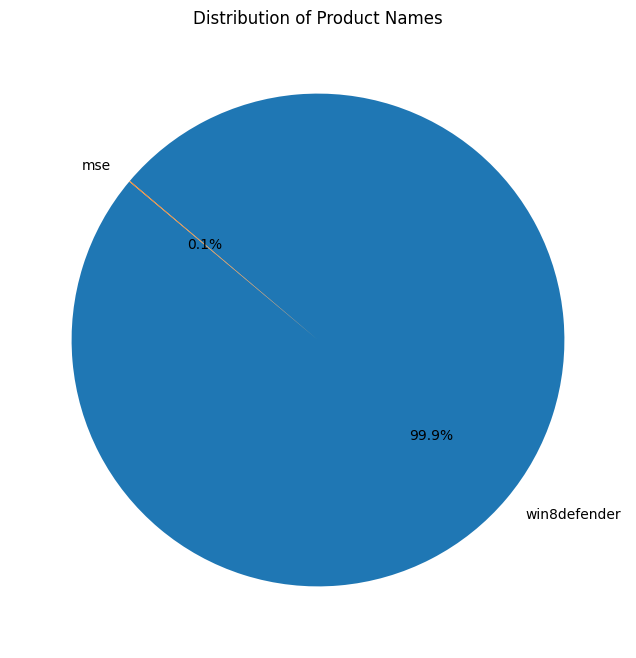

In [15]:
#Pie Chart
product_counts = train_data["ProductName"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Product Names")
plt.show()

**Observations-**
1. The majority of the entries (99.9%) in the ProductName column are labeled as win8defender. This indicates that almost all machines in the dataset are using Windows Defender as their antivirus product. This overwhelming dominance suggests that the dataset is heavily skewed toward a single product.
2. Only 0.1% of the entries are labeled as mse. This indicates that very few machines in the dataset use Microsoft Security Essentials as their antivirus product.

In [16]:
train_data["AppVersion"].unique()

array(['4.18.1807.18075', '4.12.17007.18011', '4.13.17134.228',
       '4.14.17639.18041', '4.18.1806.18062', '4.12.16299.15',
       '4.14.17613.18039', '4.10.209.0', '4.16.17656.18052',
       '4.12.17007.18022', '4.11.15063.0', '4.8.10240.17443',
       '4.9.10586.672', '4.9.10586.1106', '4.11.15063.447',
       '4.13.17134.1', '4.9.10586.0', '4.9.10586.873', '4.10.14393.0',
       '4.8.10240.16384', '4.9.10586.494', '4.9.10586.1045',
       '4.11.15063.1155', '4.13.17134.191', '4.10.14393.1794',
       '4.10.14393.1198', '4.8.10240.17797', '4.13.17134.112',
       '4.8.10240.17914', '4.12.17007.17123', '4.10.14393.1613',
       '4.9.10586.839', '4.8.10240.17946', '4.10.14393.953',
       '4.9.10586.589', '4.10.14393.1593', '4.9.10586.962',
       '4.10.14393.1066', '4.8.10240.17394', '4.18.1809.2',
       '4.13.17134.319', '4.9.10586.916', '4.8.10240.17202',
       '4.9.10586.965', '4.14.17613.18038', '4.8.207.0',
       '4.8.10240.17861', '4.10.14393.2273', '4.10.14393.2248',
    

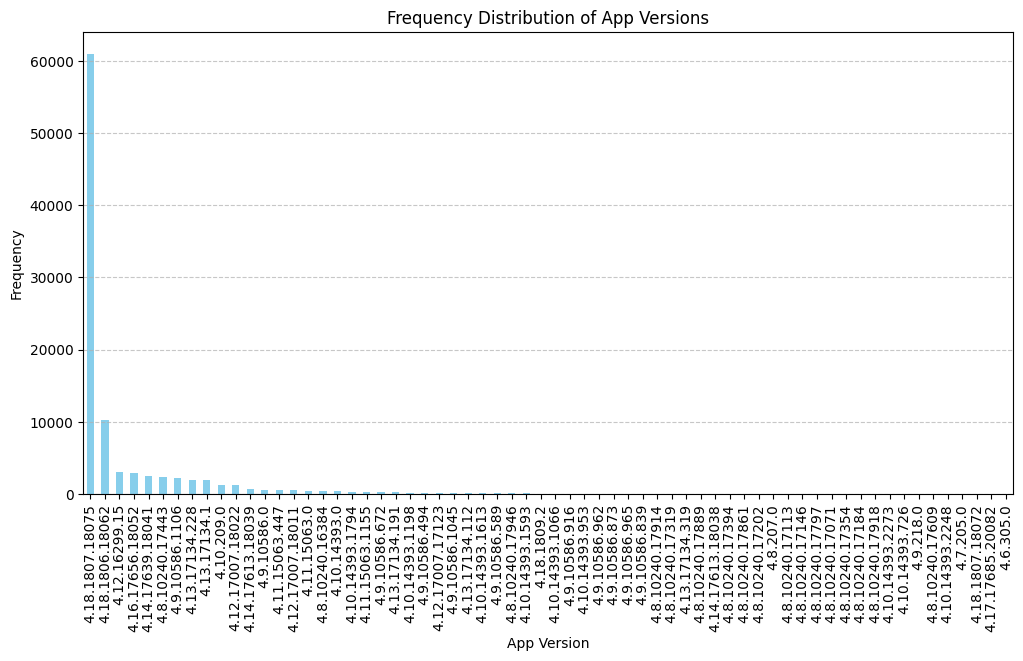

In [17]:
app_version_counts = train_data["AppVersion"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
app_version_counts.plot(kind='bar', color='skyblue')

# Formatting the plot
plt.xlabel("App Version")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of App Versions")
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Observations-**
1. The AppVersion feature is dominated by a few versions, with 4.18.1807.18075 being the most frequent version (over 60,000 occurrences).
2. Other versions appear less frequently, creating a long-tail distribution.
3. While a few versions are highly popular, many others have significantly lower frequencies, indicating variability in app usage across machines.

In [18]:
train_data["EngineVersion"].unique()

array(['1.1.15200.1', '1.1.15100.1', '1.1.15000.2', '1.1.14800.3',
       '1.1.14901.4', '1.1.14700.5', '1.1.15300.6', '1.1.14104.0',
       '1.1.15300.5', '1.1.13701.0', '1.1.13504.0', '1.1.15000.1',
       '1.1.14600.4', '1.1.13202.0', '1.1.14500.5', '1.1.14306.0',
       '1.1.13601.0', '1.1.13407.0', '1.1.14202.0', '1.1.14405.2',
       '1.1.13000.0', '1.1.13804.0', '1.1.14500.2', '1.1.14800.1',
       '1.1.14901.3', '1.1.13103.0', '1.1.13903.0', '1.1.12805.0',
       '1.1.14700.4', '1.1.14305.0', '1.1.13704.0', '1.1.12902.0',
       '1.1.14700.3', '1.1.13303.0', '1.1.14003.0', '1.1.13802.0'],
      dtype=object)

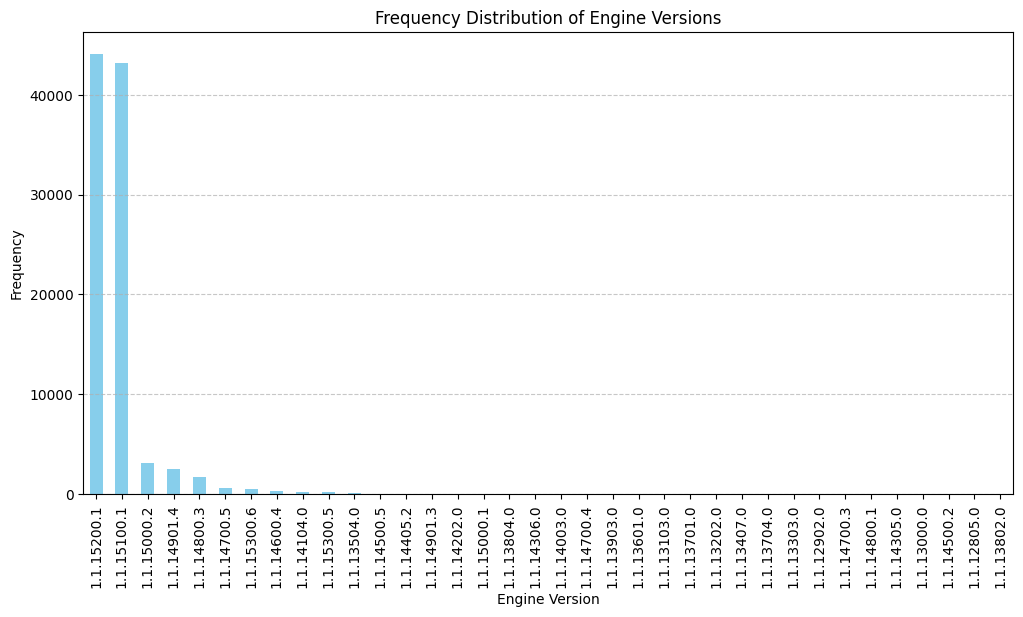

In [19]:
engine_version_counts = train_data["EngineVersion"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
engine_version_counts.plot(kind='bar', color='skyblue')

# Formatting the plot
plt.xlabel("Engine Version")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Engine Versions")
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Observations-**
1. The engine versions 11.15200.1 and 11.15000.2 are the most frequent, collectively accounting for a large proportion of the dataset.
2. Less frequent engine versions may represent older or niche configurations, which could provide insights into specific system behaviors.

In [20]:
train_data["IsBetaUser"].unique()

array([0])

**Observations-**
1. All the users in this datasets are not Beta Users.

In [21]:
train_data["IsPassiveModeEnabled"].unique()

array([0, 1])

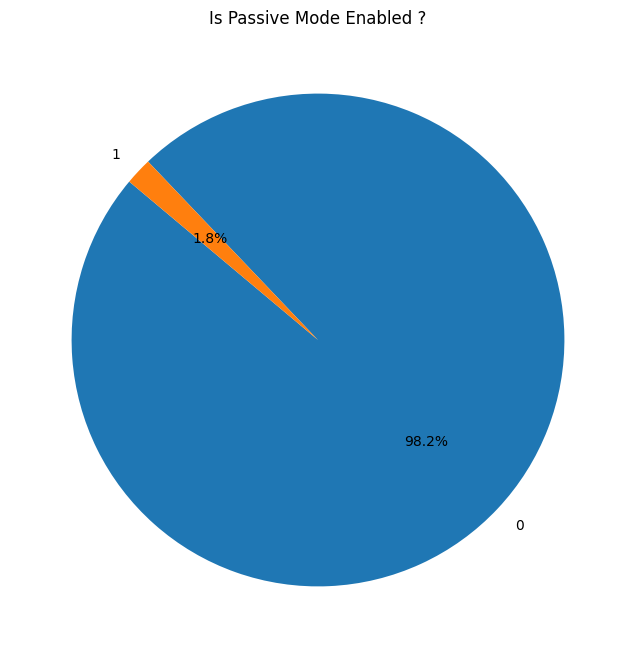

In [22]:
passive_count = train_data["IsPassiveModeEnabled"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(passive_count, labels=passive_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Is Passive Mode Enabled ?")
plt.show()

**Observation-**
1. The majority of machines (98.2%) have passive mode disabled (0), while only 1.8% have it enabled (1).

In [23]:
train_data["RealTimeProtectionState"].unique()

array([7., 0., 8., 5., 3., 1.])

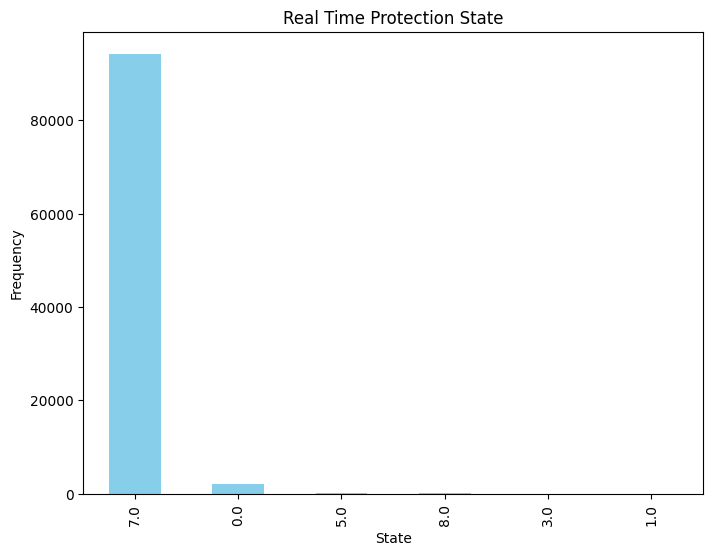

In [24]:
rtpstate_count = train_data["RealTimeProtectionState"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
rtpstate_count.plot(kind='bar', color='skyblue')
plt.title("Real Time Protection State")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show()

**Observations-**
1. The majority of the entries in the RealTimeProtectionState feature are concentrated in state 7.0, with a frequency close to 90,000.
2. The dominance of state 7.0 could reflect a default or standard configuration for most machines.
3. Other states, such as 0.0, 1.0, 3.0, 5.0, and 8.0, are present in very small numbers, making them rare categories in the dataset.

In [25]:
train_data["NumAntivirusProductsInstalled"].unique()

array([1., 2., 3., 4., 5.])

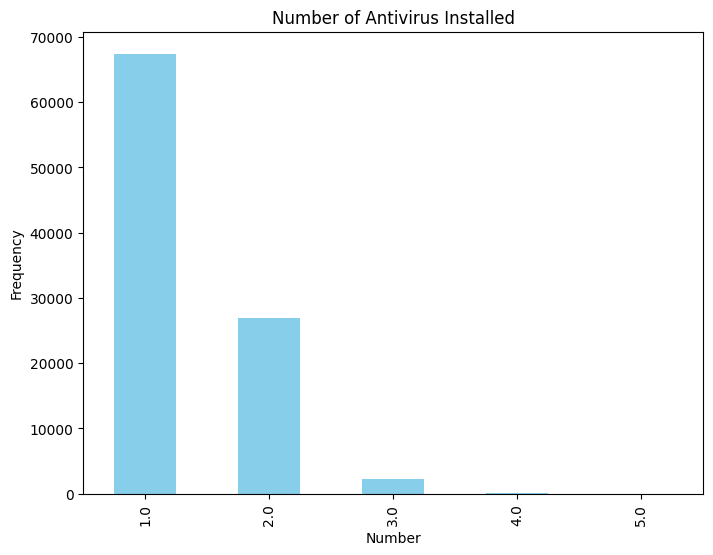

In [26]:
atinstall_count = train_data["NumAntivirusProductsInstalled"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
atinstall_count.plot(kind='bar', color='skyblue')
plt.title("Number of Antivirus Installed")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

**Observations-**
1. Most machines have only 1 antivirus product installed, accounting for approximately 70% of the dataset.
2. Machines with 2 antivirus products installed form the second-largest group, representing around 20-30% of the entries.
3. Machines with more than 2 antivirus products (e.g., 3, 4, or 5) are extremely rare, indicating that having multiple antivirus solutions is uncommon.

In [27]:
train_data["NumAntivirusProductsEnabled"].unique()

array([1., 2., 0., 3., 4.])

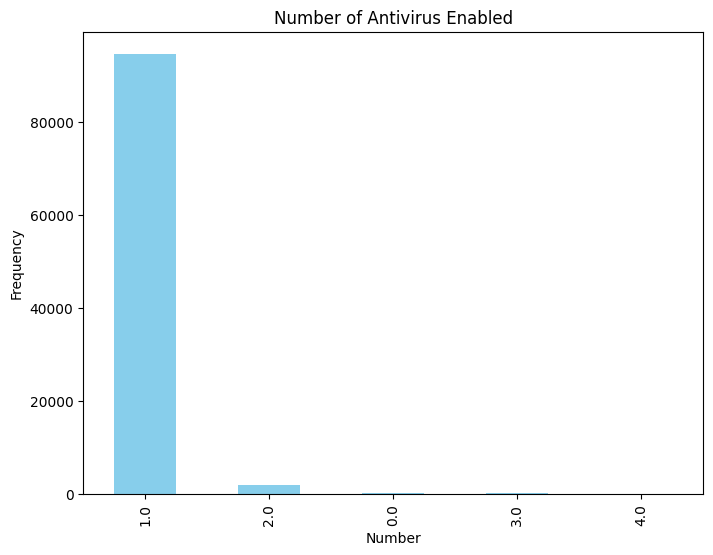

In [28]:
atenable_count = train_data["NumAntivirusProductsEnabled"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
atenable_count.plot(kind='bar', color='skyblue')
plt.title("Number of Antivirus Enabled")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

**Observations-**
1. The vast majority of machines have only 1 antivirus product enabled, accounting for nearly all entries in the dataset.
2. This suggests that even if multiple antivirus products are installed, only one is actively protecting the system.
3. Machines with more than 1 enabled antivirus product are extremely rare, indicating that simultaneous protection by multiple solutions is uncommon.

In [29]:
train_data["HasTpm"].unique()

array([1, 0])

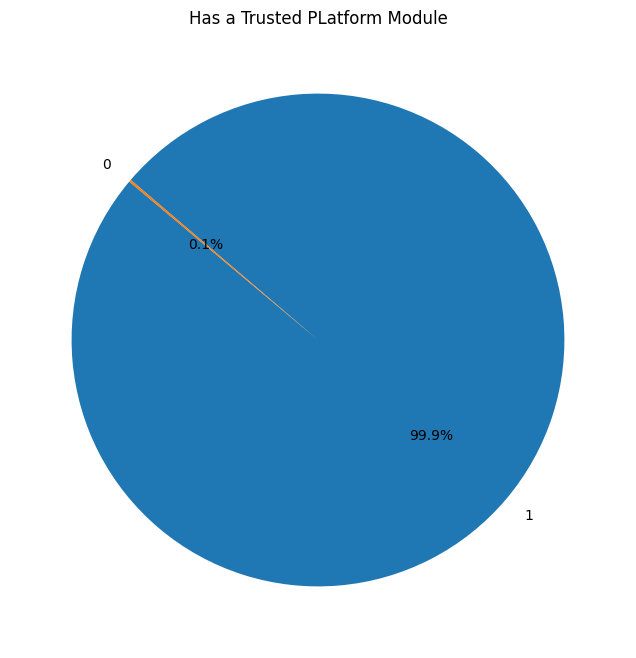

In [30]:
tpm_count = train_data["HasTpm"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(tpm_count, labels=tpm_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Has a Trusted PLatform Module")
plt.show()

**Observations-**
1. Almost all the users (99.9%) have a trusted platform module, only 0.1% of users dont.

In [31]:
train_data["PlatformType"].unique()

array(['windows10', 'windows8', 'windows7'], dtype=object)

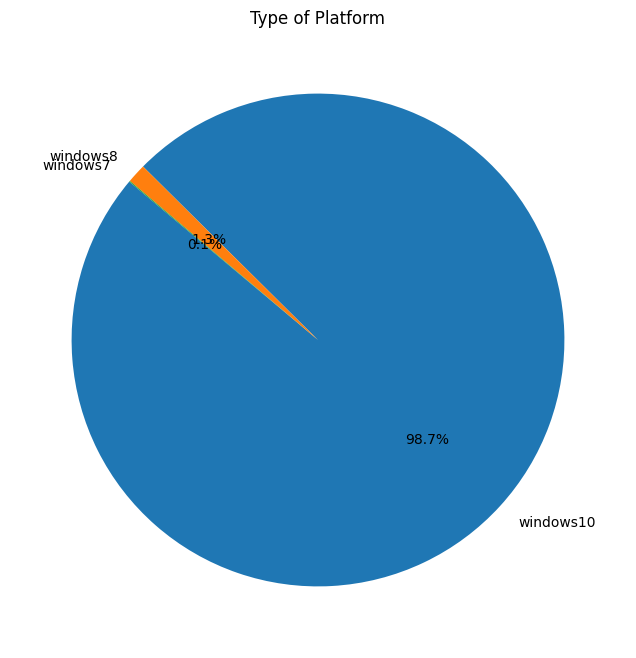

In [32]:
platform_count = train_data["PlatformType"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(platform_count, labels=platform_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Type of Platform")
plt.show()

**Observations-**
1. Windows 10 accounts for a staggering 98.7% of the dataset, indicating it is the predominant operating system among the machines analyzed.
2. Windows 8 and Windows 7 collectively account for only a small fraction (1.3%) of the dataset.
3. The feature is highly imbalanced toward Windows 10

In [33]:
train_data["Processor"].unique()

array(['x86', 'x64', 'arm64'], dtype=object)

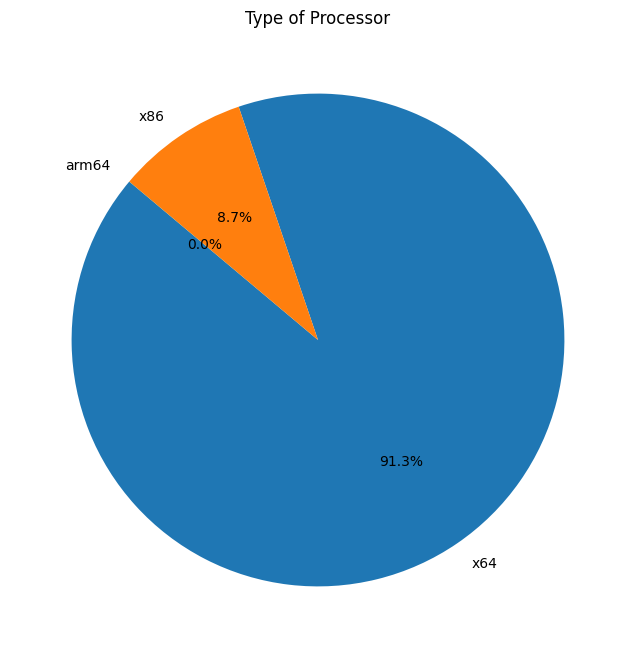

In [34]:
processor_count = train_data["Processor"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(processor_count, labels=processor_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Type of Processor")
plt.show()

**Observations-**
1. The majority of machines in the dataset use x64 processors, accounting for 91.3% of the total. This indicates that most systems are running on 64-bit architecture, which is standard for modern devices.
2. x86 processors make up 8.7% of the dataset, representing systems with 32-bit architecture.
3. arm64 processors are almost non-existent in the dataset, contributing 0.0% to the total.

In [35]:
train_data["OSVersion"].unique()

array(['10.0.0.0', '6.3.0.0', '10.0.2.0', '10.0.1.0', '6.1.1.0',
       '10.0.3.0', '10.0.4.0'], dtype=object)

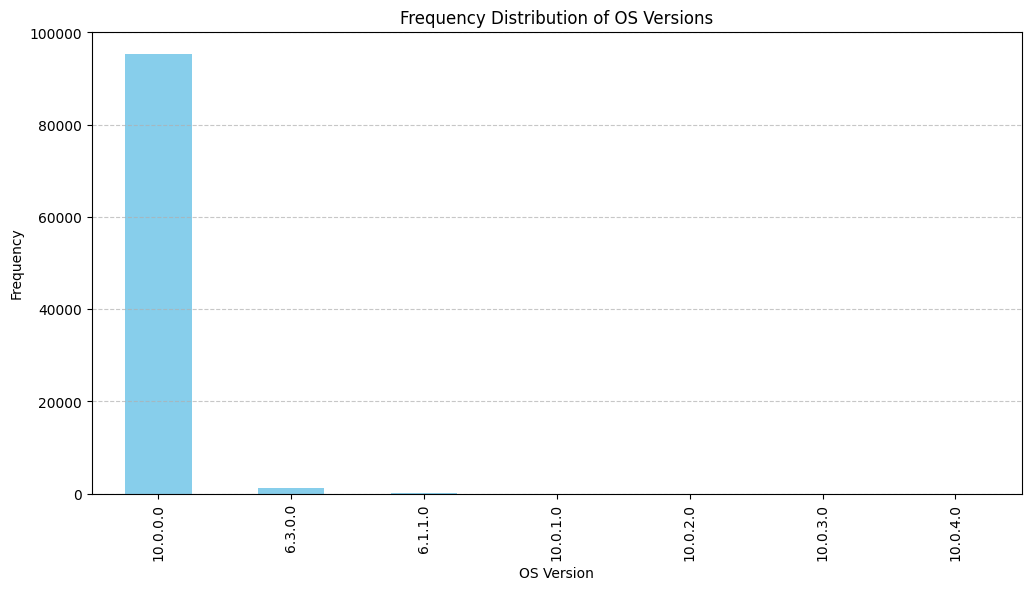

In [36]:
os_version_counts = train_data["OSVersion"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
os_version_counts.plot(kind='bar', color='skyblue')

# Formatting the plot
plt.xlabel("OS Version")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of OS Versions")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

**Observations-**
1. The OS version 10.0.0.0 (Windows 10) overwhelmingly dominates the dataset, with nearly all machines using this version.
2. Older OS versions like 6.3.0.0 (Windows 8) and 6.1.0.0 (Windows 7) appear in very small frequencies, indicating limited usage of legacy systems.
3. A few entries correspond to other minor or less common versions (e.g., 10.0.1.0, 10.0.2.0), but their presence is negligible compared to Windows 10.

In [37]:
train_data["IsSystemProtected"].unique()

array([1., 0.])

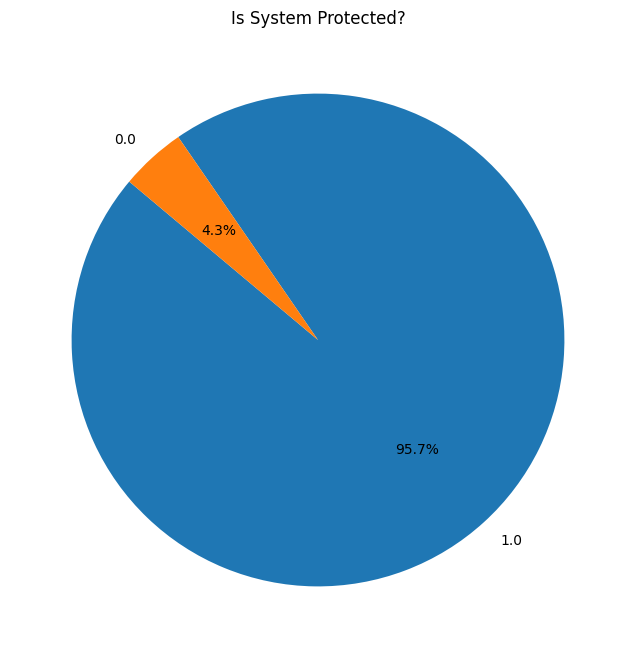

In [38]:
protected_count = train_data["IsSystemProtected"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(protected_count, labels=protected_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Is System Protected?")
plt.show()

**Observations-**
1. Most users (95.7%) have their systems protected whereas 4.3% of users dont.

In [39]:
train_data["PrimaryDiskType"].unique()

array(['SSD', 'HDD', 'Unspecified', 'UNKNOWN'], dtype=object)

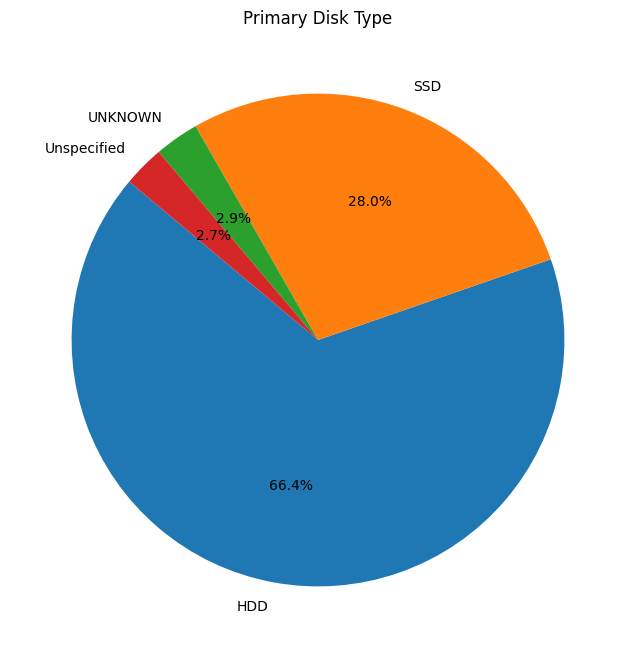

In [40]:
pdisk_count = train_data["PrimaryDiskType"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pdisk_count, labels=pdisk_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Primary Disk Type")
plt.show()

**Observations-**
1. The majority of machines (66.4%) use HDDs as their primary disk type, indicating a preference for traditional hard drives.
2. SSDs account for 28%, reflecting a growing trend toward faster and more efficient storage solutions.
3. Disk types labeled as "UNKNOWN" and "Unspecified" collectively make up about 5.6%, which might represent incomplete data or rare configurations.

In [41]:
train_data["OSInstallType"].unique()

array(['Update', 'UUPUpgrade', 'Reset', 'Upgrade', 'IBSClean', 'Other',
       'Refresh', 'CleanPCRefresh', 'Clean'], dtype=object)

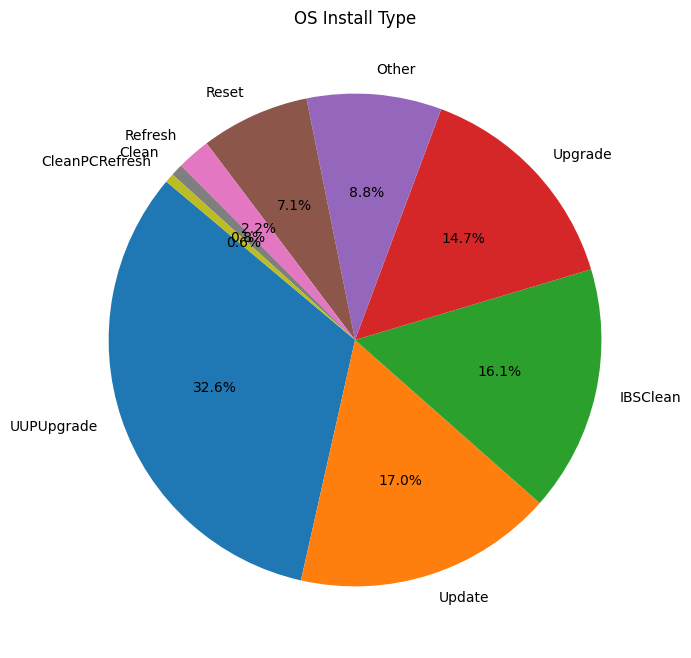

In [42]:
osinstall_count = train_data["OSInstallType"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(osinstall_count, labels=osinstall_count.index, autopct='%1.1f%%', startangle=140)
plt.title("OS Install Type")
plt.show()

**Observations-**
1. The majority (32.6%) of OS installations are categorized as UUPUpgrade, indicating frequent upgrades through Unified Update Platform.
2. Other installation types include Update (17%), IBSClean (16.1%), and Upgrade (14.7%) among others, reflecting varied approaches to OS setup across systems.
3. Methods like CleanPCRefresh, Refresh, and Clean collectively account for less than 5%, suggesting that clean installations are uncommon compared to upgrades or updates.

In [43]:
train_data["OSGenuineState"].unique()

array(['IS_GENUINE', 'INVALID_LICENSE', 'OFFLINE', 'UNKNOWN'],
      dtype=object)

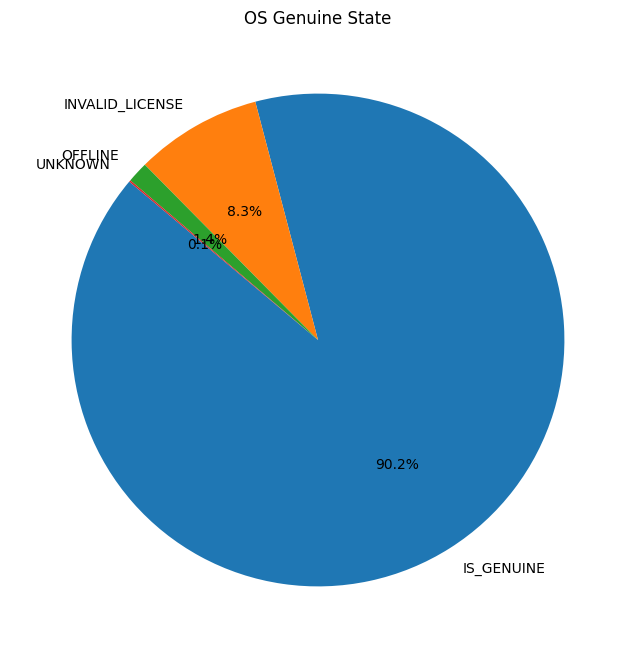

In [44]:
osgen_count = train_data["OSGenuineState"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(osgen_count, labels=osgen_count.index, autopct='%1.1f%%', startangle=140)
plt.title("OS Genuine State")
plt.show()

**Observations-**
1. About 90% of users have a genuine software
2. 8.3% of users have an invalid software
3. 1.4% of users are offline

In [45]:
train_data["IsGamer"].unique()

array([0., 1.])

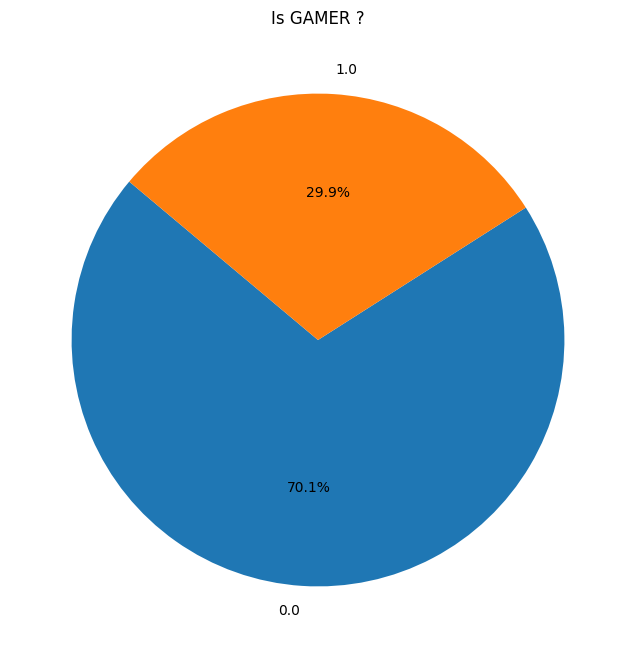

In [46]:
gamer_count = train_data["IsGamer"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gamer_count, labels=gamer_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Is GAMER ?")
plt.show()

**Observations-**
1. About 70% of users are gamers in thid dataset.

**Heatmap**

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

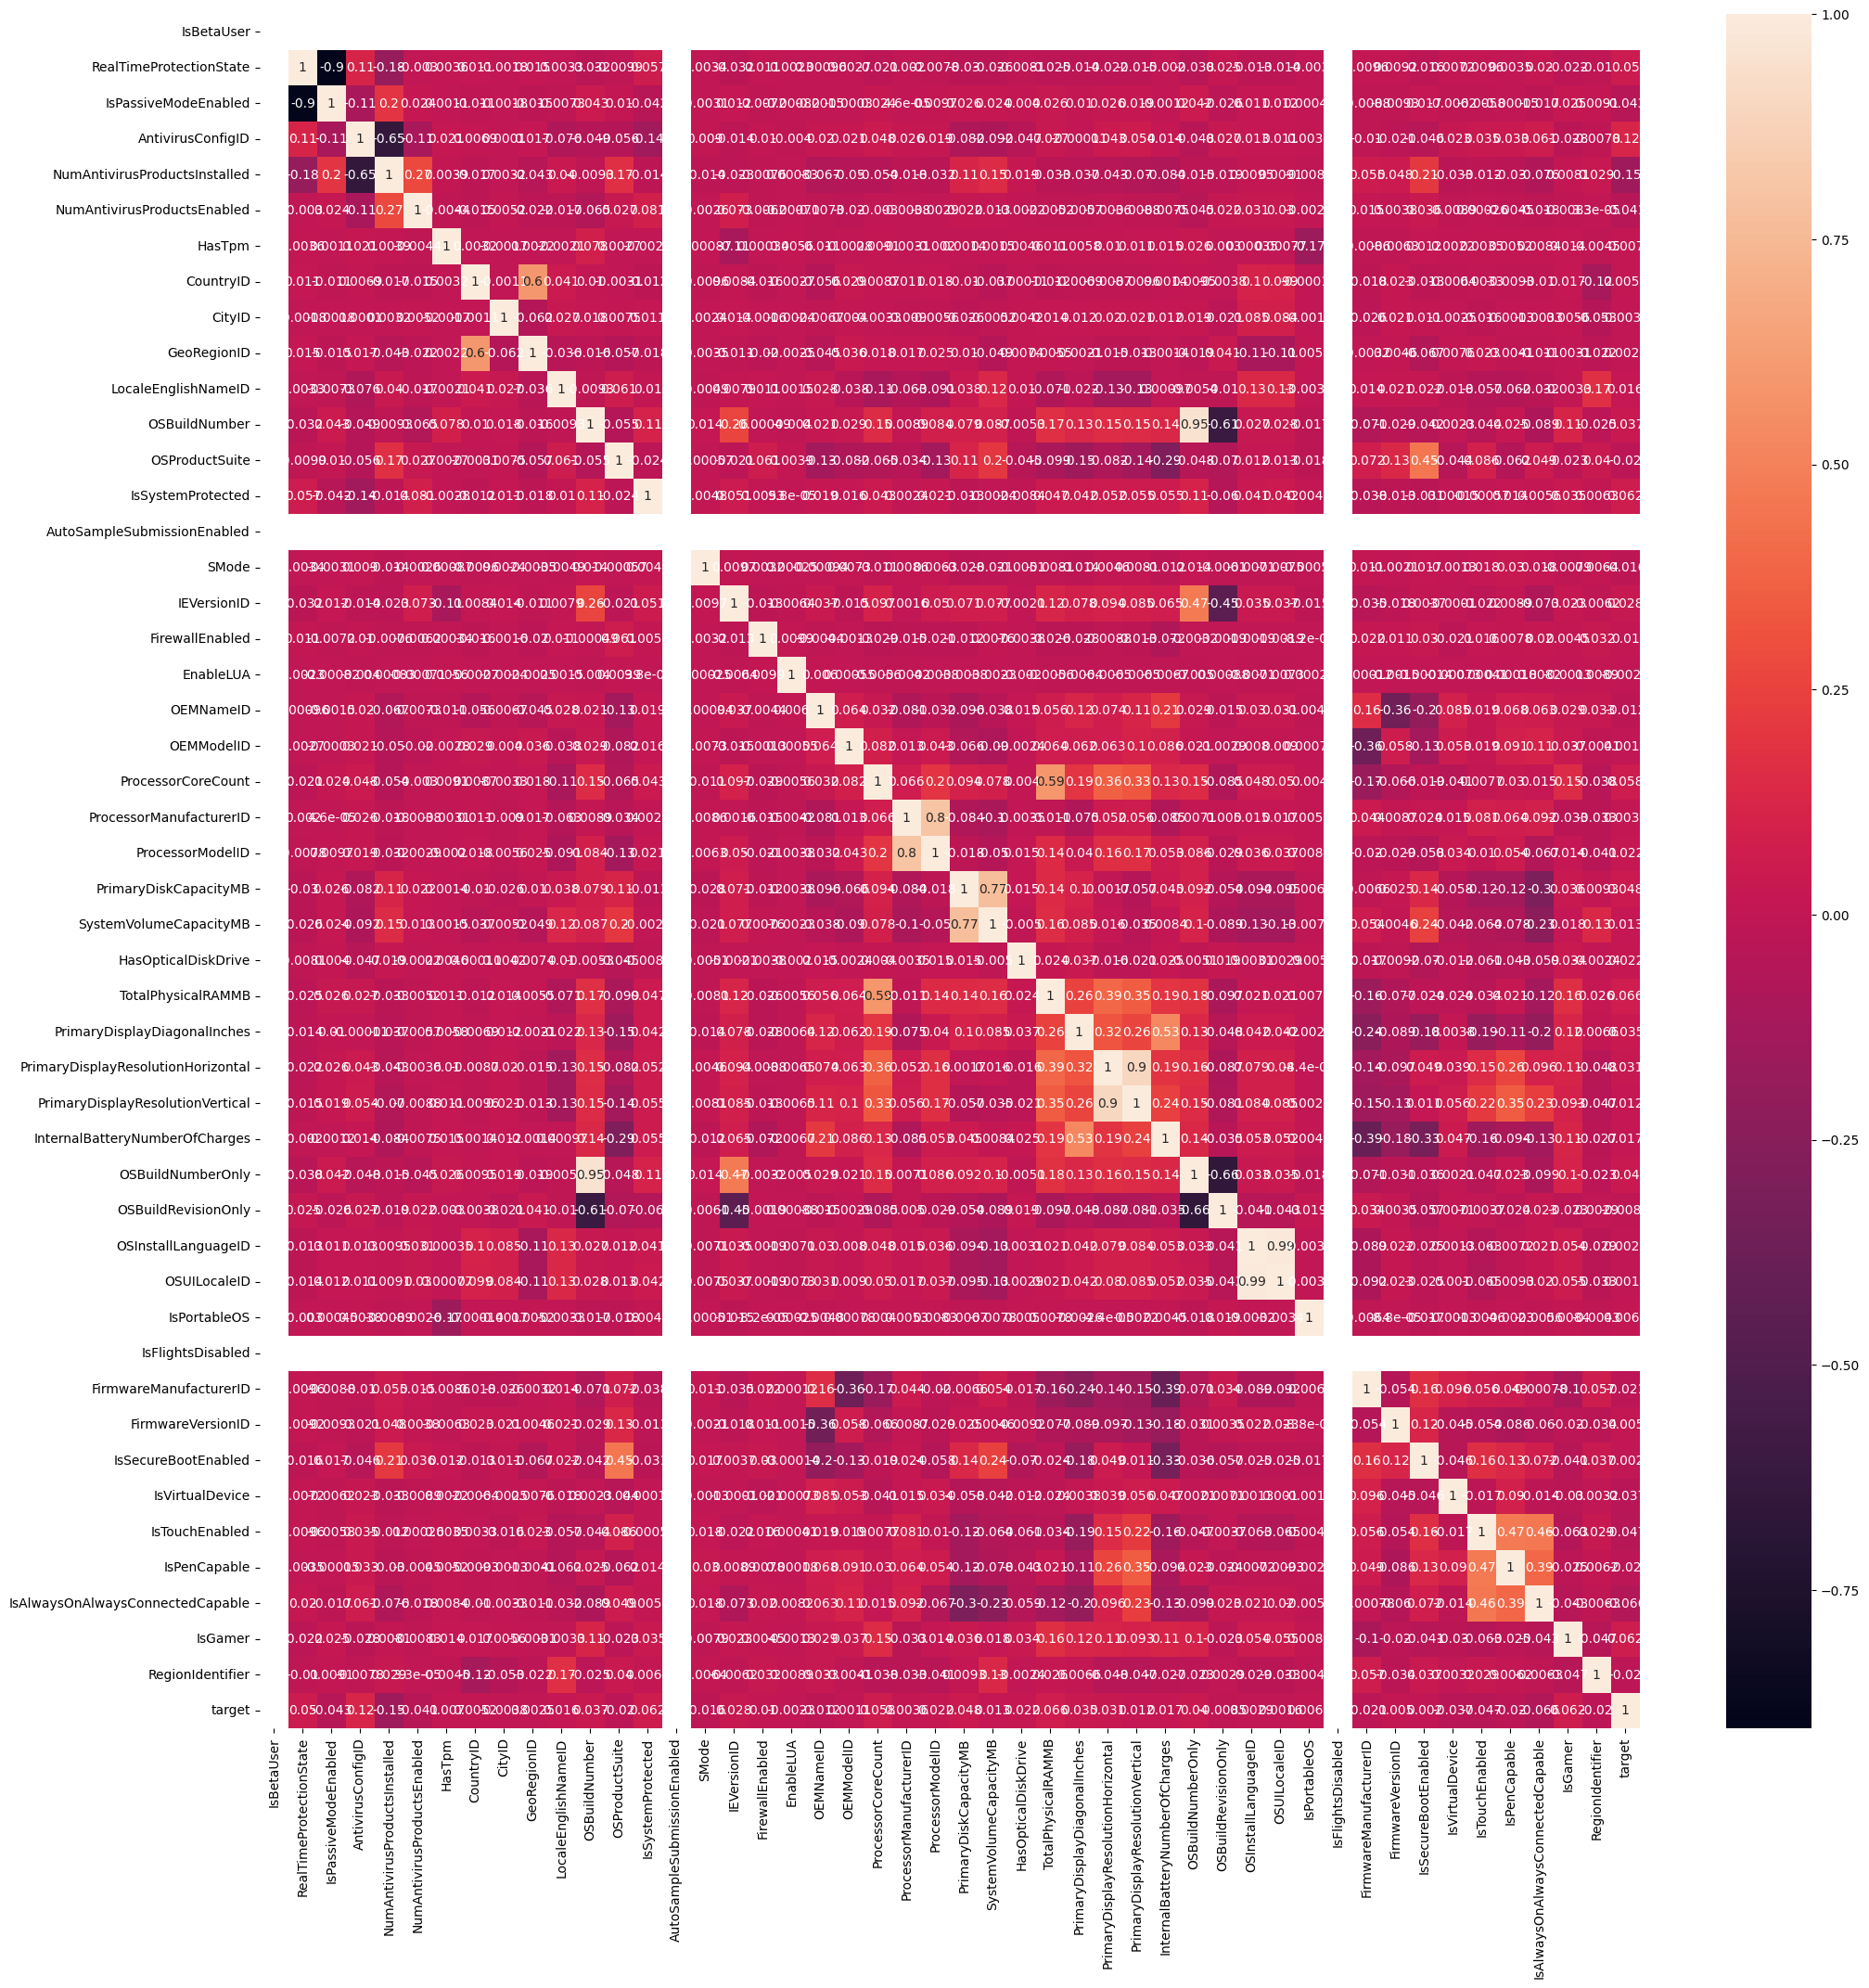

In [47]:
numeric = train_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_data[numeric].corr()
plt.figure(figsize=(24,24))
sns.heatmap(corr_matrix, annot= True)

**Observations-**
1. Certain features exhibit strong positive correlations (values close to 1), indicating a linear relationship between them. For example:
PrimaryDiskCapacityMB and SystemVolumeCapacityMB have a high correlation, suggesting that system volume size is closely tied to the primary disk capacity.
ProcessorCoreCount and TotalPhysicalRAMMB show a moderate correlation, which may reflect that systems with more cores tend to have higher RAM.
2. Many features have weak correlations (values close to 0), indicating little to no linear relationship. For example:
RealTimeProtectionState shows minimal correlation with most other features, suggesting independence.
Features like IsBetaUser and IsPassiveModeEnabled also exhibit weak correlations with other variables.


In [48]:
from sklearn.impute import SimpleImputer

modeimputation=["RealTimeProtectionState","AntivirusConfigID","CityID","IsSystemProtected","SMode","IEVersionID","FirewallEnabled","EnableLUA",
                "OEMNameID", "OEMModelID","ProcessorManufacturerID","ProcessorModelID","PrimaryDiskType","ChassisType","OSInstallLanguageID","IsFlightsDisabled","FirmwareManufacturerID",
                "FirmwareVersionID","IsVirtualDevice" ,"IsAlwaysOnAlwaysConnectedCapable","IsGamer" ,"RegionIdentifier" ,"DateOS"]

meanimputation=["PrimaryDisplayDiagonalInches","PrimaryDisplayResolutionHorizontal","PrimaryDisplayResolutionVertical"]

roundmeanimputation=["NumAntivirusProductsInstalled","NumAntivirusProductsEnabled","ProcessorCoreCount","PrimaryDiskCapacityMB","SystemVolumeCapacityMB",
                    "TotalPhysicalRAMMB","InternalBatteryNumberOfCharges"]

#Imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
#train_data[modeimputation] = pd.DataFrame(mode_imputer.fit_transform(train_data[modeimputation]), columns=modeimputation)

# Imputer for Mean
mean_imputer = SimpleImputer(strategy='mean')
#train_data[meanimputation] = pd.DataFrame(mean_imputer.fit_transform(train_data[meanimputation]), columns=meanimputation)

# Imputer for Rounded Mean (0 decimal places)
rounded_mean_imputer = SimpleImputer(strategy='mean')
#train_data[roundmeanimputation] = pd.DataFrame(np.round(rounded_mean_imputer.fit_transform(train_data[roundmeanimputation]), 0), columns=roundmeanimputation)

In [49]:
X=train_data.drop(["target"], axis=1)
y=train_data["target"]

In [50]:
import datetime
from datetime import datetime

In [51]:
#Extract the year,month,day, and datetime from DATE_AS.
X['DateAS_Year'] = pd.to_datetime(X['DateAS']).dt.year
X['DateAS_Month'] = pd.to_datetime(X['DateAS']).dt.month
X['DateAS_Day'] = pd.to_datetime(X['DateAS']).dt.day
X['DateAS_time'] = pd.to_datetime(X['DateAS']).dt.time
#Extract the year, month and day from DATE_OS.
X['DateOS_Year'] = pd.to_datetime(X['DateOS']).dt.year
X['DateOS_Month'] = pd.to_datetime(X['DateOS']).dt.month
X['DateOS_Day'] = pd.to_datetime(X['DateOS']).dt.day


In [52]:
X["DateAS"] = pd.to_datetime(X["DateAS"])
X["DateOS"] = pd.to_datetime(X["DateOS"])
X["OS_Usage_Days"] = (X["DateAS"] - X["DateOS"]).dt.days
X["Disk_Utilization"] = X["PrimaryDiskCapacityMB"] / X["SystemVolumeCapacityMB"]
X["RAM_per_Core"] = X["TotalPhysicalRAMMB"] / X["ProcessorCoreCount"]
X["Screen_Resolution"] = X["PrimaryDisplayResolutionHorizontal"] / X["PrimaryDisplayResolutionVertical"]

In [53]:
X

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,DateAS_Month,DateAS_Day,DateAS_time,DateOS_Year,DateOS_Month,DateOS_Day,OS_Usage_Days,Disk_Utilization,RAM_per_Core,Screen_Resolution
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,9,10,10:11:00,2018,4,17,146,1.047393,256.0,0.625000
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,8,16,00:01:00,2018,8,14,2,1.001341,1024.0,1.777778
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,9,20,23:20:00,2018,9,11,9,1.002694,2048.0,1.777778
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,9,14,00:32:00,2018,1,3,254,1.008966,2048.0,1.778646
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,9,15,19:34:00,2018,9,11,4,5.780717,1024.0,1.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,a378b2196a7a1d8ee0d4f989ee46730e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,...,9,21,00:59:00,2018,9,20,1,1.005070,2048.0,1.777778
99996,7f4433ca05d24b9bbdd3932f8b05e61f,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,...,8,10,07:23:00,2018,7,10,31,1.002739,1024.0,1.778646
99997,d6852dfff534e03d5ddfd3c7875ab072,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,...,8,26,23:51:00,2018,3,13,166,1.790664,1024.0,1.778646
99998,70a8dc682128c9ff78a3de5aea9dac74,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,...,6,4,17:13:00,2018,5,8,27,1.963921,4096.0,1.500000


In [54]:
finalX=X.drop(["DateAS","DateOS","PrimaryDisplayResolutionHorizontal","PrimaryDisplayResolutionVertical","MachineID", "OEMModelID", "FirmwareManufacturerID"],axis=1)

In [55]:
finalX

,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,...,DateAS_Month,DateAS_Day,DateAS_time,DateOS_Year,DateOS_Month,DateOS_Day,OS_Usage_Days,Disk_Utilization,RAM_per_Core,Screen_Resolution
0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,...,9,10,10:11:00,2018,4,17,146,1.047393,256.0,0.625000
1,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,...,8,16,00:01:00,2018,8,14,2,1.001341,1024.0,1.777778
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,...,9,20,23:20:00,2018,9,11,9,1.002694,2048.0,1.777778
3,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,...,9,14,00:32:00,2018,1,3,254,1.008966,2048.0,1.778646
4,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,...,9,15,19:34:00,2018,9,11,4,5.780717,1024.0,1.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,1.0,...,9,21,00:59:00,2018,9,20,1,1.005070,2048.0,1.777778
99996,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,1.0,...,8,10,07:23:00,2018,7,10,31,1.002739,1024.0,1.778646
99997,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,1.0,...,8,26,23:51:00,2018,3,13,166,1.790664,1024.0,1.778646
99998,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,1.0,...,6,4,17:13:00,2018,5,8,27,1.963921,4096.0,1.500000


In [56]:
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform stratified sampling
for train_index, test_index in stratified_splitter.split(finalX, y):
    X_train, X_val = finalX.iloc[train_index], finalX.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

In [57]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(77356, 79)
(19339, 79)
(77356,)
(19339,)


**Scaling**

In [58]:
numerical_cols = [
    "ProcessorCoreCount", "TotalPhysicalRAMMB", "PrimaryDiskCapacityMB", 
    "SystemVolumeCapacityMB", "InternalBatteryNumberOfCharges", 
    "PrimaryDisplayDiagonalInches", 
    "OS_Usage_Days", "Disk_Utilization", "RAM_per_Core", "Screen_Resolution",
    "NumAntivirusProductsInstalled","NumAntivirusProductsEnabled"
]

categorical_cols = [
    "ProductName", "PlatformType", "Processor", "OSVersion", "OSBuildNumber",
    "OSBranch", "OSEdition", "SKUEditionName", "OsPlatformSubRelease", 
    "FirmwareVersionID","EngineVersion","AppVersion","SignatureVersion",
    "OSBuildLab","MDC2FormFactor","DeviceFamily",
    "OEMNameID","ProcessorModelID","PrimaryDiskType","ChassisType",
    "PowerPlatformRole","NumericOSVersion","OSArchitecture","OSSkuFriendlyName",
    "OSInstallType","AutoUpdateOptionsName","OSGenuineState","LicenseActivationChannel",
    "FlightRing"
]

numerical_pipeline = Pipeline(steps=[("scaler", StandardScaler())])
categorical_pipeline = Pipeline(steps=[("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))])

#column transformer to apply transformations
ct = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_cols),
        ("cat", categorical_pipeline, categorical_cols)
    ]
)

# Fit and transform the training data
X_train_processed = ct.fit_transform(X_train)
X_val_processed = ct.transform(X_val)


In [59]:
X_train_processed

array([[-0.00522696,  0.42416379, -1.12042655, ...,  1.        ,
         0.        ,  3.        ],
       [-1.00359001, -0.42138511, -1.03374372, ...,  1.        ,
         1.        ,  3.        ],
       [-1.00359001, -0.63277233, -0.11272129, ...,  1.        ,
         2.        ,  3.        ],
       ...,
       [-0.00522696, -0.42138511, -1.14209796, ...,  1.        ,
         2.        ,  3.        ],
       [-1.00359001, -0.63277233, -0.60032107, ...,  1.        ,
         2.        ,  3.        ],
       [-0.00522696,  0.42416379,  1.2417181 , ...,  1.        ,
         2.        ,  3.        ]])

In [60]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier(random_state=42)
dummy.fit(X_train_processed,y_train)
y_hat_train=dummy.predict(X_train_processed)
y_hat_val=dummy.predict(X_val_processed)
train_score = ac(y_hat_train, y_train)
val_score = ac(y_hat_val, y_val)
print(f'Train score: {train_score}, Validation score: {val_score}')

Train score: 0.5064248409948808, Validation score: 0.5064377682403434


In [61]:
Lr=LogisticRegression(max_iter=5000,random_state=42,n_jobs=-1)
Lr.fit(X_train_processed,y_train)
Lr_y_hat_train=Lr.predict(X_train_processed)
Lr_y_hat_val=Lr.predict(X_val_processed)
Lr_train_score = ac(Lr_y_hat_train, y_train)
Lr_val_score = ac(Lr_y_hat_val, y_val)
print(f'Train score: {Lr_train_score}, Validation score: {Lr_val_score}')

Train score: 0.5878794146543255, Validation score: 0.5969284864781013


In [62]:
#Hyperparameter tuning with RandomizedSearchCV (LogisticRegression)
params = {'penalty' : ['l1','l2'],"max_iter":[1000,2000,3000,5000],'C':[0.5,1,2,3,1.5]}

Lr_rs = RandomizedSearchCV(Lr,param_distributions=params,cv=5,n_jobs=-1)
Lr_rs.fit(X_train_processed,y_train)
Lr_rs_y_hat_train=Lr_rs.predict(X_train_processed)
Lr_rs_y_hat_val=Lr_rs.predict(X_val_processed)
Lr_rs_train_score = ac(Lr_rs_y_hat_train, y_train)
Lr_rs_val_score = ac(Lr_rs_y_hat_val, y_val)
print(f'Train score: {Lr_rs_train_score}, Validation score: {Lr_rs_val_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Train score: 0.587724287708775, Validation score: 0.597910957133254


In [63]:
#Hyperparameter tuning with RandomizedSearchCV (RandomForestClassifier)
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1)
random_search.fit(X_train_processed, y_train)
cv_y_hat_train=Lr.predict(X_train_processed)
cv_y_hat_val=Lr.predict(X_val_processed)
cv_train_score = ac(cv_y_hat_train, y_train)
cv_val_score = ac(cv_y_hat_val, y_val)
print(f'Train score: {cv_train_score}, Validation score: {cv_val_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Train score: 0.5878794146543255, Validation score: 0.5969284864781013


In [64]:
#RandomForestClassifier
rf_class = RandomForestClassifier(random_state=42,n_jobs=-1)
rf_class.fit(X_train_processed, y_train)
rf_y_hat_train=rf_class.predict(X_train_processed)
rf_y_hat_val=rf_class.predict(X_val_processed)
rf_train_score = ac(rf_y_hat_train, y_train)
rf_val_score = ac(rf_y_hat_val, y_val)
print(f'Training score: {rf_train_score}, Validation score: {rf_val_score}')

Training score: 1.0, Validation score: 0.6071668648844304


In [65]:
#LightBoostClassifier
Lclf=lgb.LGBMClassifier(random_state=42,n_jobs=-1)
Lclf.fit(X_train_processed,y_train)
Lf_y_hat_train=Lclf.predict(X_train_processed)
Lf_y_hat_val=Lclf.predict(X_val_processed)
Lf_train_score = ac(Lf_y_hat_train, y_train)
Lf_val_score = ac(Lf_y_hat_val, y_val)
print(f'Training score: {Lf_train_score}, Validation score: {Lf_val_score}')

[LightGBM] [Info] Number of positive: 39175, number of negative: 38181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3134
[LightGBM] [Info] Number of data points in the train set: 77356, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506425 -> initscore=0.025701
[LightGBM] [Info] Start training from score 0.025701
Training score: 0.6496070117379389, Validation score: 0.6238171570401779


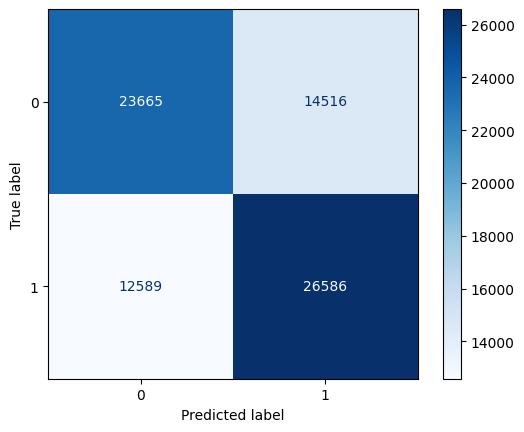

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmlcftrain = confusion_matrix(y_train, Lf_y_hat_train)

#Visualize confusion matrix
displcftrain = ConfusionMatrixDisplay(confusion_matrix=cmlcftrain, display_labels=Lclf.classes_)
displcftrain.plot(cmap='Blues')

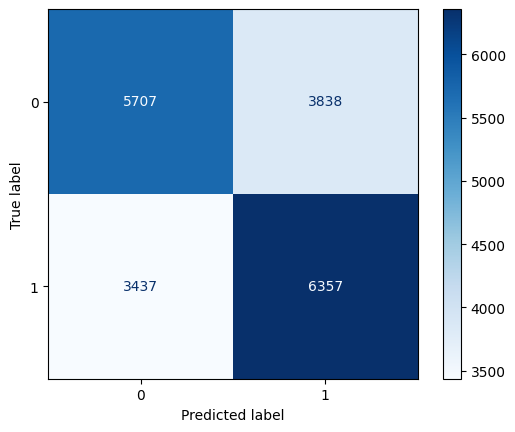

In [69]:
cmlcfval = confusion_matrix(y_val, Lf_y_hat_val)

#Visualize confusion matrix
displcfval = ConfusionMatrixDisplay(confusion_matrix=cmlcfval, display_labels=Lclf.classes_)
displcfval.plot(cmap='Blues')

In [71]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=42,n_jobs=-1)
xgb.fit(X_train_processed,y_train)
xg_y_hat_train=xgb.predict(X_train_processed)
xg_y_hat_val=xgb.predict(X_val_processed)
xg_train_score = ac(xg_y_hat_train, y_train)
xg_val_score = ac(xg_y_hat_val, y_val)
print(f'Training score: {xg_train_score}, Validation score: {xg_val_score}')

Training score: 0.7036558250168055, Validation score: 0.6127514349242463


In [72]:
#Bagging Classifier
B1_classifier = BaggingClassifier(n_jobs=-1,random_state=42)
B1_classifier.fit(X_train_processed, y_train)
bg_y_hat_train=B1_classifier.predict(X_train_processed)
bg_y_hat_val=B1_classifier.predict(X_val_processed)
bg_train_score = ac(bg_y_hat_train, y_train)
bg_val_score = ac(bg_y_hat_val, y_val)
print(f'Training score: {bg_train_score}, Validation score: {bg_val_score}')

Training score: 0.9832075081441647, Validation score: 0.5734526087181343


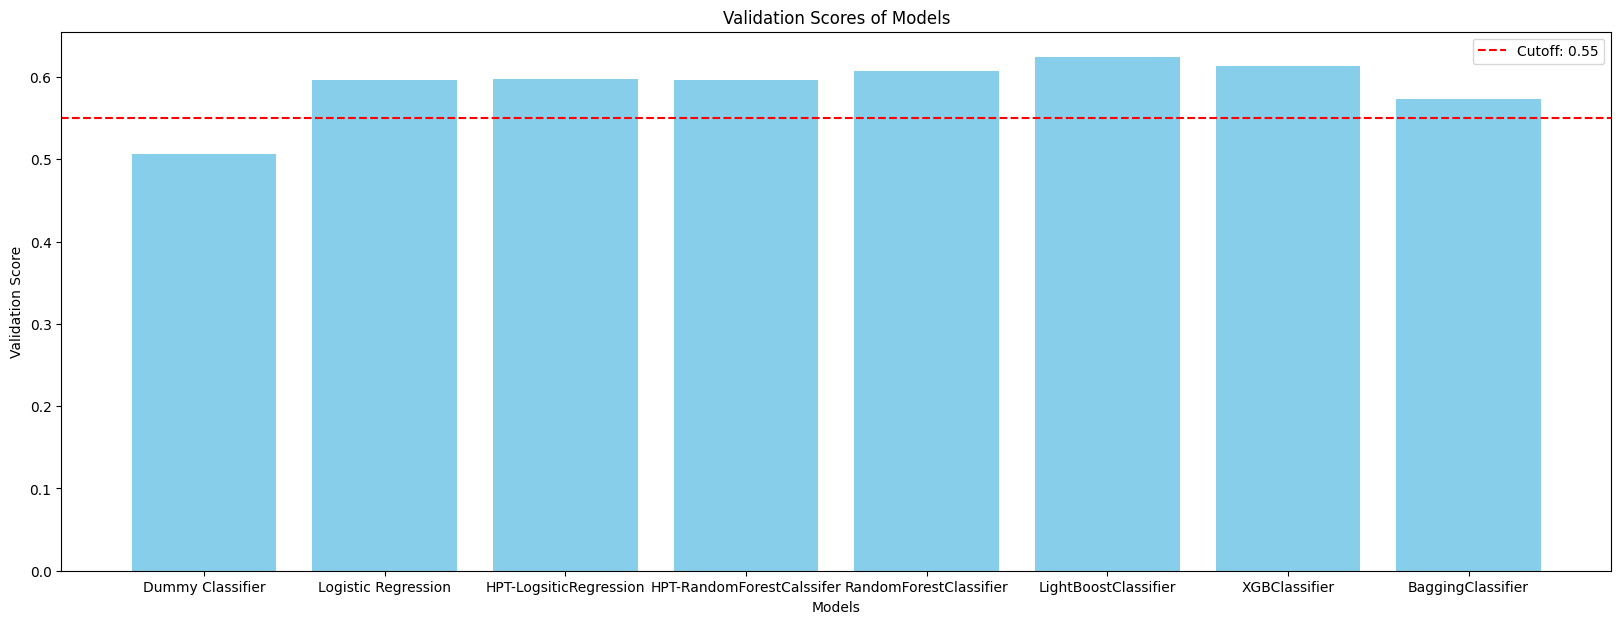

In [79]:
# Example validation scores for different models
models = ['Dummy Classifier', 'Logistic Regression', 'HPT-LogsiticRegression', 'HPT-RandomForestCalssifer', 'RandomForestClassifier','LightBoostClassifier','XGBClassifier','BaggingClassifier']
validation_scores = [val_score, Lr_val_score, Lr_rs_val_score, cv_val_score, rf_val_score, Lf_val_score, xg_val_score, bg_val_score]

# Filter models with scores >= cutoff
cutoff = 0.55

# Plot the graph
plt.figure(figsize=(20, 7))
plt.bar(models, validation_scores, color='skyblue')
plt.axhline(y=cutoff, color='red', linestyle='--', label=f'Cutoff: {cutoff}')
plt.title('Validation Scores of Models')
plt.xlabel('Models')
plt.ylabel('Validation Score')
plt.legend()
plt.show()


In [80]:
test_data

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,42d3ddb25eeb149517e2b6871b061df4,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1329.0,0,7.0,0,32554.0,3.0,...,20107.0,0,0.0,0,0,0.0,0.0,13.0,2018-09-16 18:15:00,2018-09-11
9996,3d474c494d797cafc2ab1665711f0f91,win8defender,1.1.15100.1,4.11.15063.0,1.273.894.0,0,7.0,0,53447.0,1.0,...,11386.0,0,0.0,0,0,0.0,1.0,1.0,2018-08-05 22:50:00,2017-04-05
9997,9aee2fc73af8240a688ceb83d41c0418,win8defender,1.1.15200.1,4.18.1807.18075,1.275.504.0,0,7.0,0,47238.0,2.0,...,12247.0,1,0.0,0,0,0.0,0.0,11.0,2018-08-31 16:03:00,2018-06-12
9998,a2f8c1f88b78271c38767fe43850b359,win8defender,1.1.15200.1,4.18.1807.18075,1.275.461.0,0,7.0,0,53447.0,1.0,...,4269.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-30 18:35:00,2017-12-12


In [81]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  object 
 1   ProductName                         10000 non-null  object 
 2   EngineVersion                       10000 non-null  object 
 3   AppVersion                          10000 non-null  object 
 4   SignatureVersion                    10000 non-null  object 
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             9991 non-null   float64
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   9998 non-null   float64
 9   NumAntivirusProductsInstalled       9998 non-null   float64
 10  NumAntivirusProductsEnabled         9998 non-null   float64
 11  HasTpm                              10000 

In [82]:
#for numerical column
test_data.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
count,10000.0,9991.000000,10000.000000,9998.00000,9998.000000,9998.000000,10000.00000,10000.000000,9939.000000,9999.000000,...,9965.0,9968.000000,9971.000000,10000.000000,9993.000000,10000.000000,10000.000000,9988.000000,9938.000000,9938.000000
mean,0.0,6.848864,0.017400,48122.25075,1.327065,1.019004,0.99620,107.675900,80985.386055,168.507151,...,0.0,404.363864,33258.776853,0.505800,0.003202,0.131000,0.041200,0.056468,0.301067,7.906219
std,0.0,1.014203,0.130763,13611.92055,0.524149,0.157627,0.06153,63.268649,49085.060889,89.279554,...,0.0,220.361535,21239.190886,0.499991,0.056501,0.337417,0.198762,0.230834,0.458745,4.522045
min,0.0,0.000000,0.000000,645.00000,1.000000,0.000000,0.00000,1.000000,41.000000,1.000000,...,0.0,93.000000,737.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,7.000000,0.000000,49480.00000,1.000000,1.000000,1.00000,50.000000,36164.000000,89.000000,...,0.0,142.000000,13182.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.0,7.000000,0.000000,53447.00000,1.000000,1.000000,1.00000,97.000000,82373.000000,181.000000,...,0.0,500.000000,33075.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,0.0,7.000000,0.000000,53447.00000,2.000000,1.000000,1.00000,160.000000,122884.500000,258.000000,...,0.0,556.000000,52530.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,0.0,8.000000,1.000000,70330.00000,5.000000,4.000000,1.00000,222.000000,167953.000000,295.000000,...,0.0,1075.000000,72038.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


In [83]:
#for categorical column
test_data.describe(include="object")

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,...,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,9997
unique,9998,2,31,59,1438,4,3,3,9,171,...,12,15,14,9,6,4,5,7,1413,95
top,f8552815f215d99bd5c0db06e09afb0a,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,9972,4501,6169,133,9831,9144,9832,4559,4279,...,4666,3925,3925,3160,4452,8989,5171,9417,133,1976


In [84]:
test_data["ProductName"].unique()

array(['win8defender', 'mse'], dtype=object)

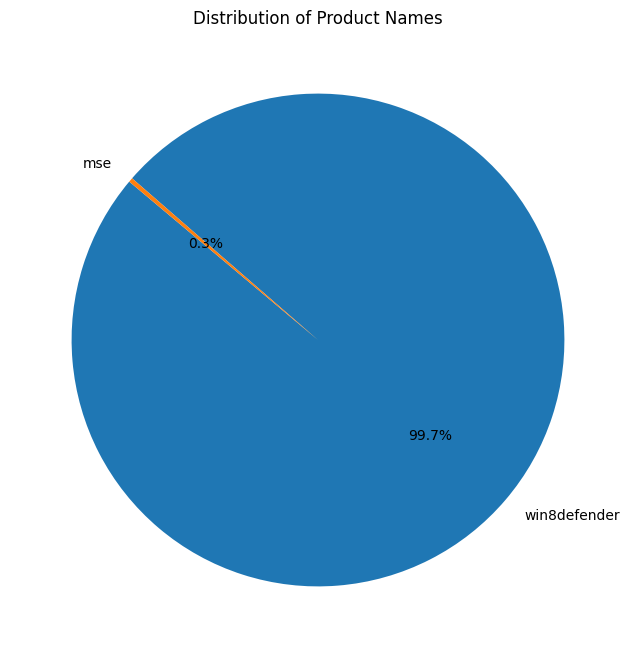

In [85]:
#Pie Chart
product_count = test_data["ProductName"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(product_count, labels=product_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Product Names")
plt.show()

In [86]:
test_data["AppVersion"].unique()

array(['4.18.1807.18075', '4.10.209.0', '4.14.17639.18041',
       '4.16.17656.18052', '4.10.14393.0', '4.18.1806.18062',
       '4.8.10240.17443', '4.12.16299.15', '4.12.17007.18022',
       '4.14.17613.18039', '4.18.1809.2', '4.13.17134.228',
       '4.9.10586.1106', '4.13.17134.1', '4.10.14393.1794', '4.9.10586.0',
       '4.10.14393.1198', '4.11.15063.0', '4.10.14393.2248',
       '4.12.17007.18011', '4.11.15063.447', '4.8.10240.16384',
       '4.10.14393.953', '4.12.17007.17123', '4.18.1806.20021',
       '4.9.10586.1045', '4.8.10240.17914', '4.10.14393.1593',
       '4.11.15063.1155', '4.8.204.0', '4.9.10586.494', '4.8.10240.17113',
       '4.11.15063.994', '4.8.10240.17184', '4.13.17134.112',
       '4.9.10586.672', '4.9.10586.839', '4.13.17134.191',
       '4.9.10586.916', '4.8.10240.17946', '4.14.17613.18038',
       '4.8.10240.17146', '4.9.218.0', '4.9.10586.962', '4.9.10586.873',
       '4.9.10586.589', '4.8.10240.17889', '4.8.10240.17319',
       '4.8.10240.17354', '4.8.207

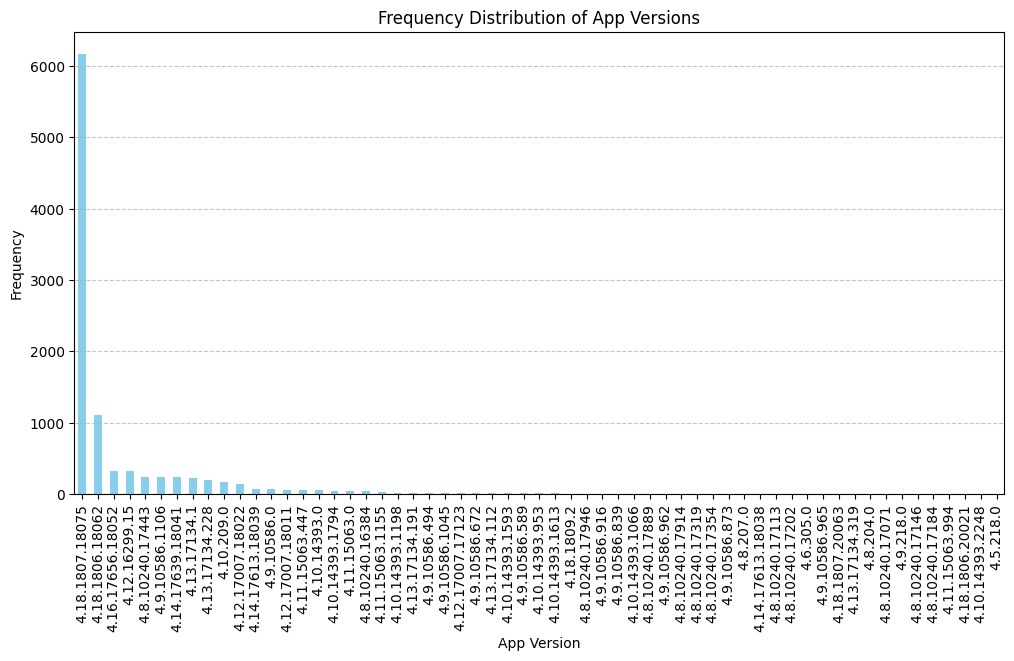

In [87]:
app_version_count = test_data["AppVersion"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
app_version_count.plot(kind='bar', color='skyblue')

# Formatting the plot
plt.xlabel("App Version")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of App Versions")
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [88]:
test_data["EngineVersion"].unique()

array(['1.1.15100.1', '1.1.15200.1', '1.1.15300.6', '1.1.14800.3',
       '1.1.15000.2', '1.1.14700.3', '1.1.14901.4', '1.1.14700.5',
       '1.1.14500.5', '1.1.14104.0', '1.1.15300.5', '1.1.13202.0',
       '1.1.14405.2', '1.1.14600.4', '1.1.13504.0', '1.1.14003.0',
       '1.1.15000.1', '1.1.13903.0', '1.1.13804.0', '1.1.14306.0',
       '1.1.14901.3', '1.1.13303.0', '1.1.14202.0', '1.1.14305.0',
       '1.1.13407.0', '1.1.13701.0', '1.1.13000.0', '1.1.13704.0',
       '1.1.13301.0', '1.1.14800.1', '1.1.13601.0'], dtype=object)

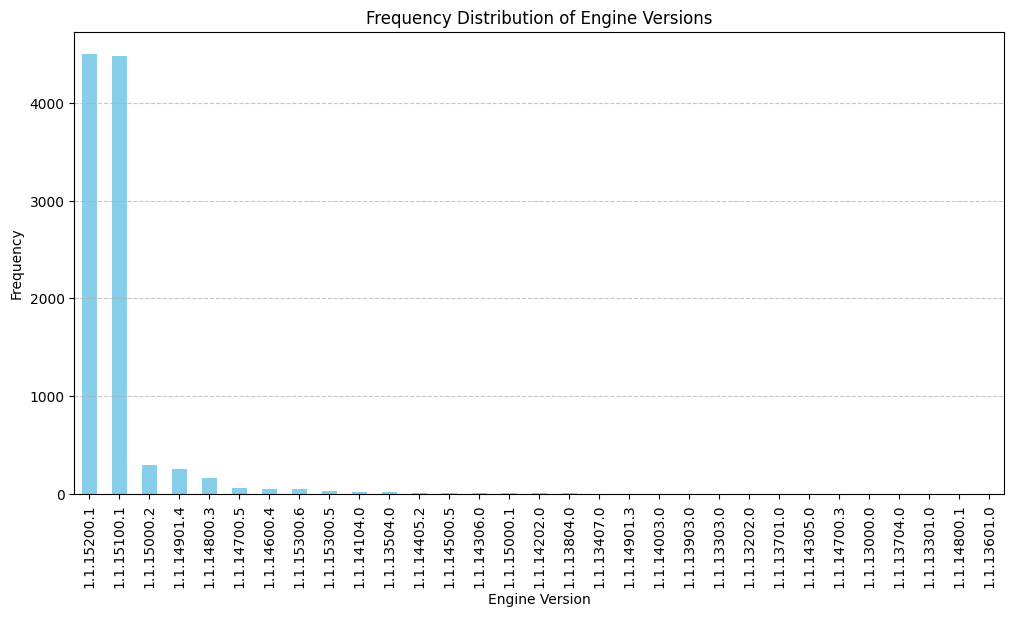

In [89]:
engine_version_count = test_data["EngineVersion"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
engine_version_count.plot(kind='bar', color='skyblue')

# Formatting the plot
plt.xlabel("Engine Version")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Engine Versions")
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [90]:
test_data["IsBetaUser"].unique()

array([0])

In [91]:
test_data["IsPassiveModeEnabled"].unique()

array([0, 1])

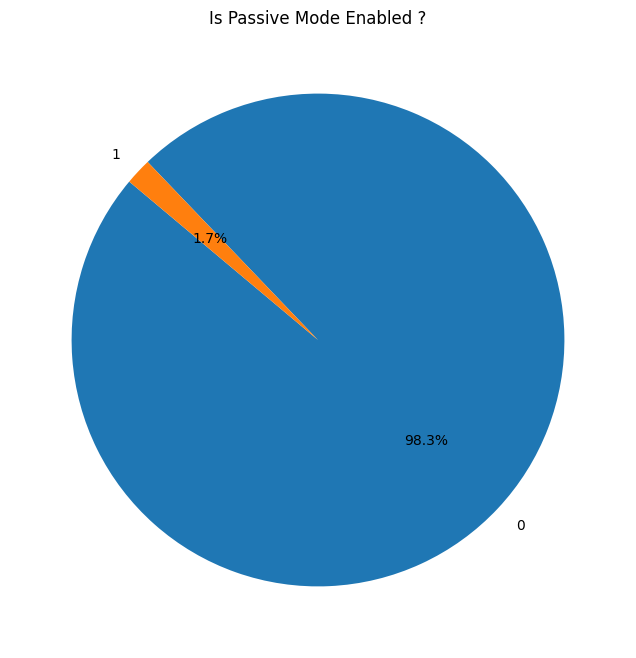

In [92]:
passive_counts = test_data["IsPassiveModeEnabled"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(passive_counts, labels=passive_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Is Passive Mode Enabled ?")
plt.show()

In [93]:
test_data["RealTimeProtectionState"].unique()

array([ 7.,  5.,  0., nan,  8.,  1.,  3.])

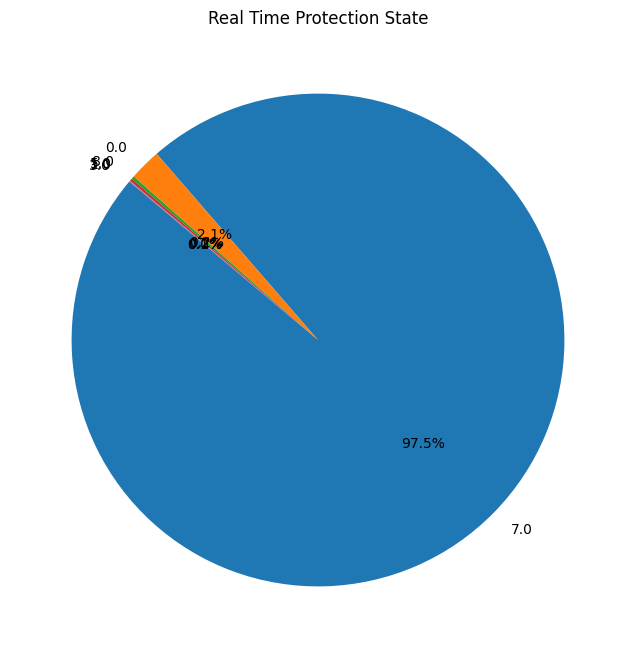

In [94]:
rtpstate_counts = test_data["RealTimeProtectionState"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rtpstate_counts, labels=rtpstate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Real Time Protection State")
plt.show()

In [95]:
test_data["NumAntivirusProductsInstalled"].unique()

array([ 1.,  2.,  3.,  5.,  4., nan])

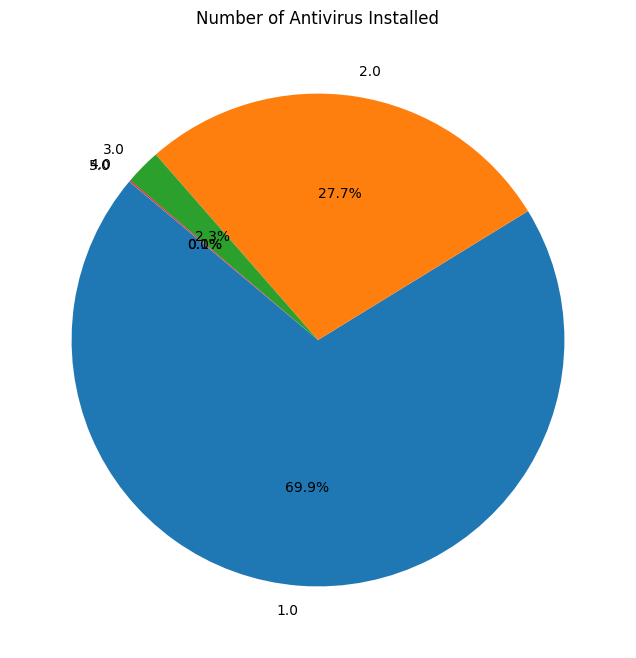

In [96]:
atinstall_counts = test_data["NumAntivirusProductsInstalled"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(atinstall_counts, labels=atinstall_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Number of Antivirus Installed")
plt.show()

In [97]:
test_data["NumAntivirusProductsEnabled"].unique()

array([ 1.,  2.,  0.,  4.,  3., nan])

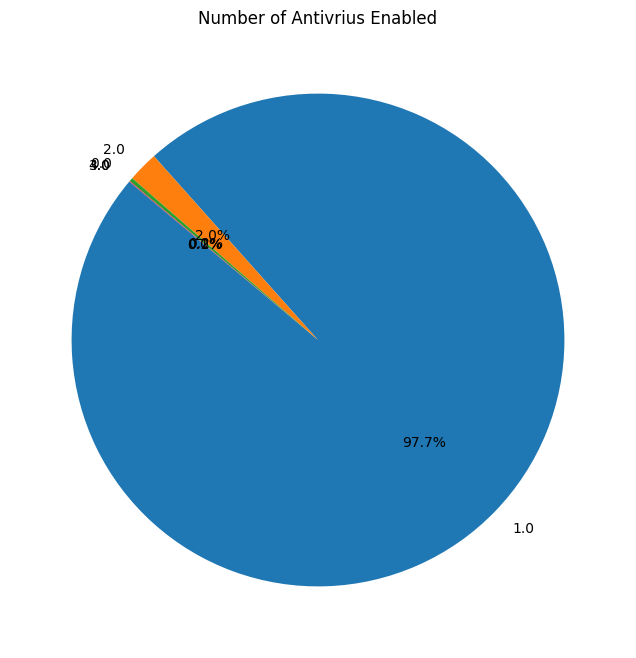

In [98]:
atenable_counts = test_data["NumAntivirusProductsEnabled"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(atenable_counts, labels=atenable_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Number of Antivrius Enabled")
plt.show()

In [99]:
test_data["HasTpm"].unique()

array([1, 0])

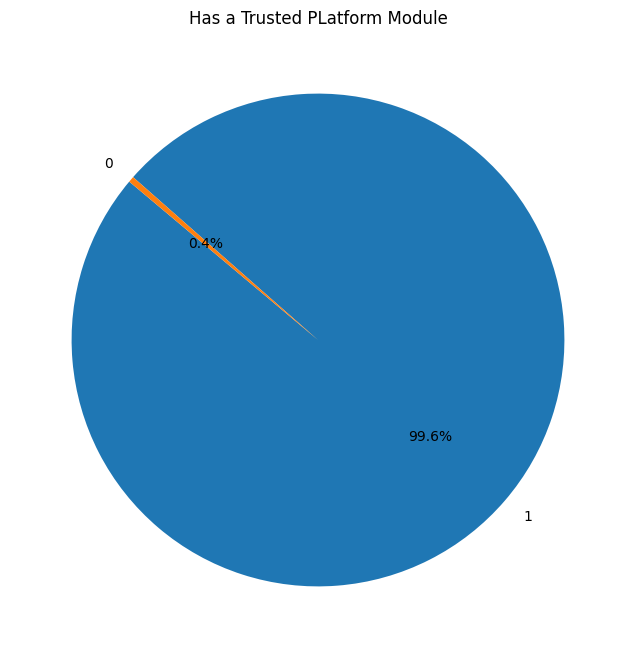

In [100]:
tpm_counts = test_data["HasTpm"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(tpm_counts, labels=tpm_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Has a Trusted PLatform Module")
plt.show()

In [101]:
test_data["PlatformType"].unique()

array(['windows10', 'windows8', 'windows7', 'windows2016'], dtype=object)

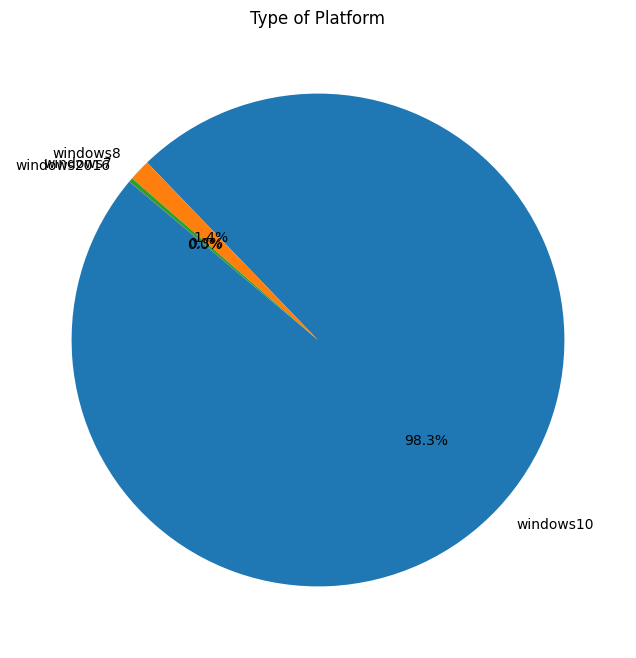

In [102]:
platform_counts = test_data["PlatformType"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Type of Platform")
plt.show()

In [103]:
test_data["Processor"].unique()

array(['x64', 'x86', 'arm64'], dtype=object)

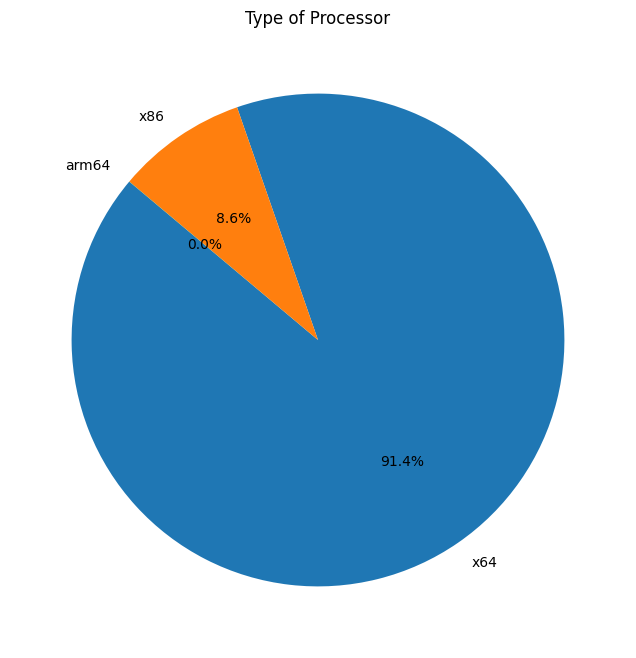

In [104]:
processor_counts = test_data["Processor"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(processor_counts, labels=processor_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Type of Processor")
plt.show()

In [105]:
test_data["OSVersion"].unique()

array(['10.0.0.0', '6.3.0.0', '6.1.1.0'], dtype=object)

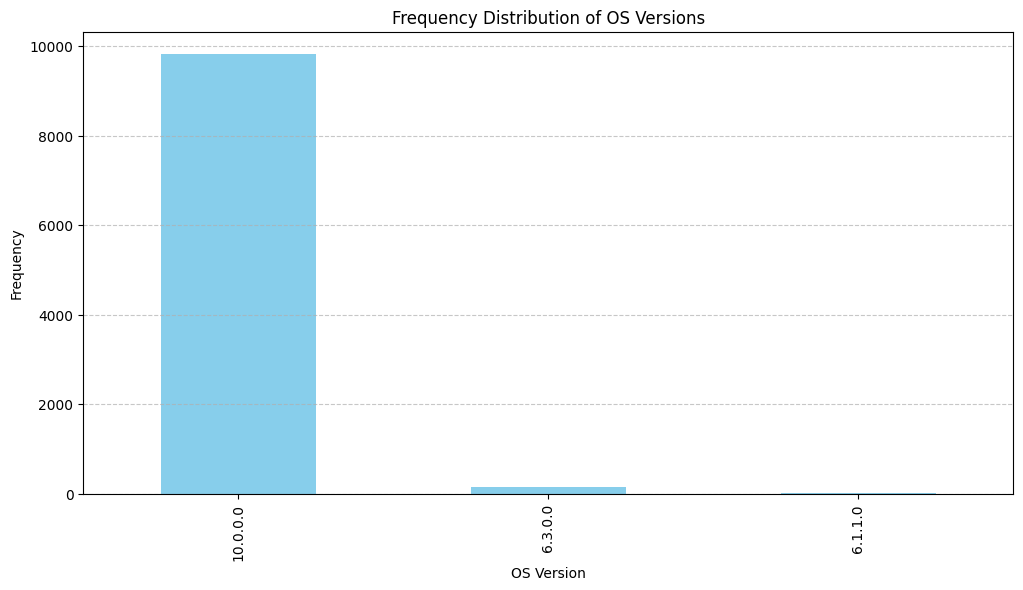

In [106]:
os_version_count = test_data["OSVersion"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
os_version_count.plot(kind='bar', color='skyblue')

# Formatting the plot
plt.xlabel("OS Version")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of OS Versions")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [107]:
test_data["IsSystemProtected"].unique()

array([ 1.,  0., nan])

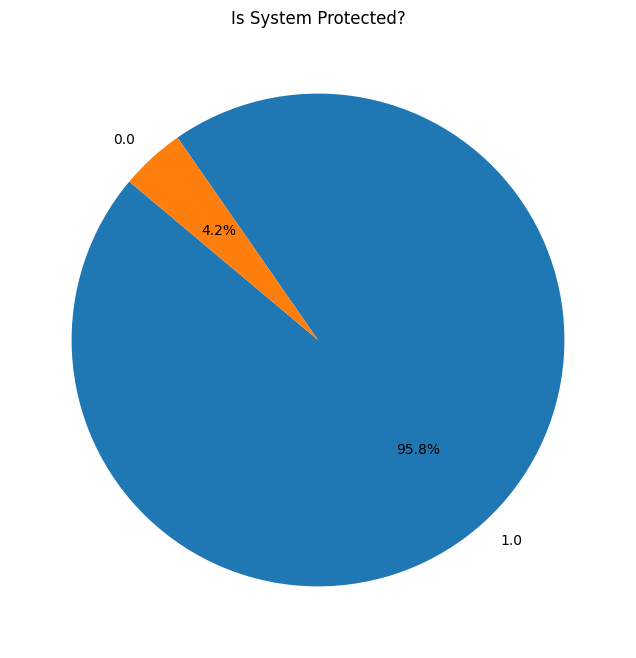

In [108]:
protected_counts = test_data["IsSystemProtected"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(protected_counts, labels=protected_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Is System Protected?")
plt.show()

In [109]:
test_data["DeviceFamily"].unique()

array(['Windows.Desktop', 'Windows.Server'], dtype=object)

In [110]:
test_data["DeviceFamily"].value_counts()

DeviceFamily
Windows.Desktop    9999
Windows.Server        1
Name: count, dtype: int64

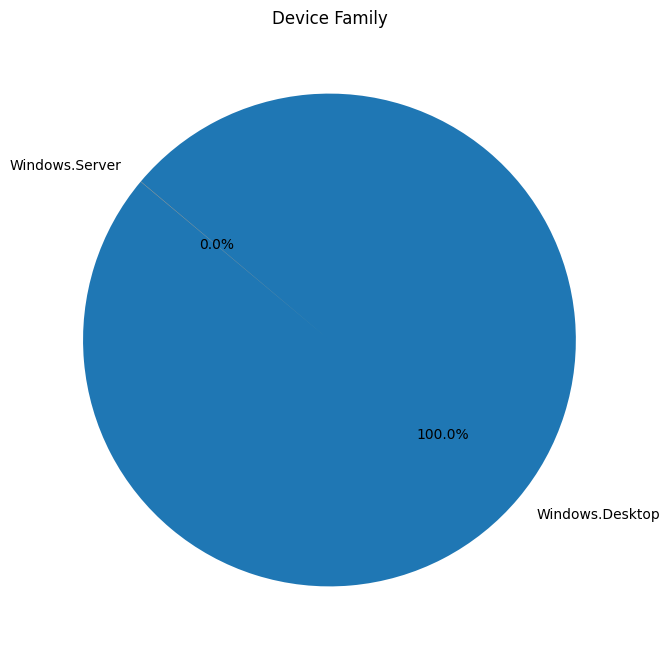

In [111]:
family_counts = test_data["DeviceFamily"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(family_counts, labels=family_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Device Family")
plt.show()

In [112]:
test_data["PrimaryDiskType"].unique()

array(['HDD', 'SSD', 'Unspecified', 'UNKNOWN', nan], dtype=object)

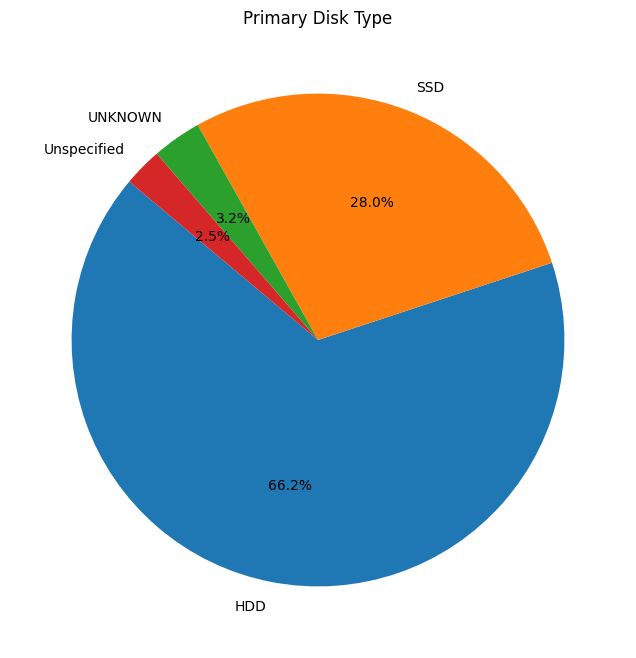

In [113]:
pdisk_counts = test_data["PrimaryDiskType"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pdisk_counts, labels=pdisk_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Primary Disk Type")
plt.show()

In [114]:
test_data["OSInstallType"].unique()

array(['UUPUpgrade', 'Update', 'Upgrade', 'Reset', 'Other', 'IBSClean',
       'CleanPCRefresh', 'Refresh', 'Clean'], dtype=object)

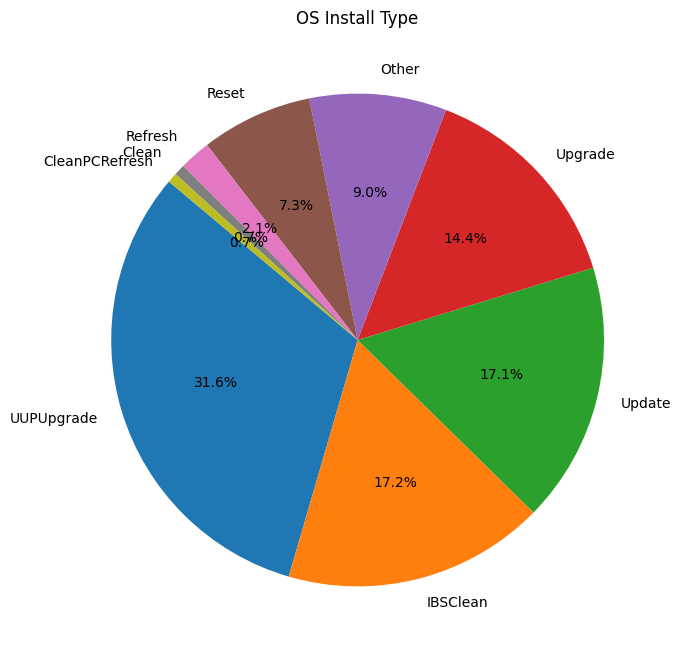

In [115]:
osinstall_counts = test_data["OSInstallType"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(osinstall_counts, labels=osinstall_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("OS Install Type")
plt.show()

In [116]:
test_data["OSGenuineState"].unique()

array(['INVALID_LICENSE', 'IS_GENUINE', 'OFFLINE', 'UNKNOWN'],
      dtype=object)

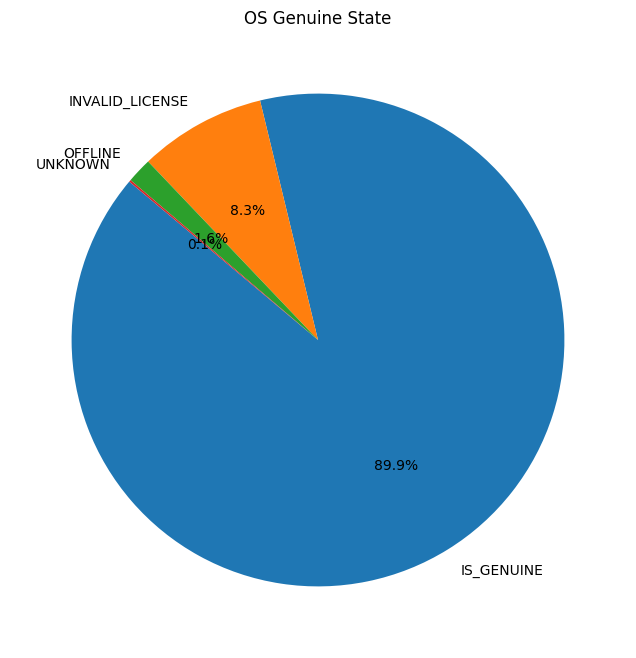

In [117]:
osgen_counts = test_data["OSGenuineState"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(osgen_counts, labels=osgen_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("OS Genuine State")
plt.show()

In [118]:
test_data["IsGamer"].unique()

array([ 1.,  0., nan])

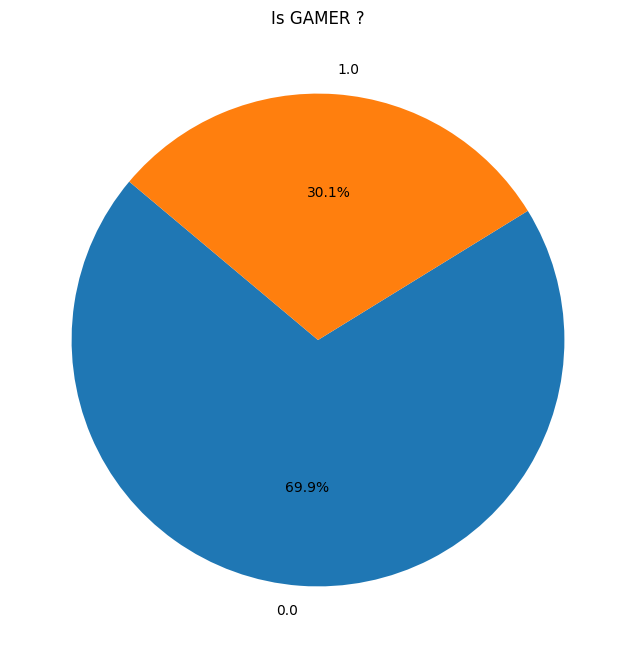

In [119]:
gamer_counts = test_data["IsGamer"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gamer_counts, labels=gamer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Is GAMER ?")
plt.show()

In [120]:
test_data[modeimputation] = pd.DataFrame(mode_imputer.fit_transform(test_data[modeimputation]), columns=modeimputation)

test_data[meanimputation] = pd.DataFrame(mean_imputer.fit_transform(test_data[meanimputation]), columns=meanimputation)

test_data[roundmeanimputation] = pd.DataFrame(np.round(rounded_mean_imputer.fit_transform(test_data[roundmeanimputation]), 0), columns=roundmeanimputation)


In [121]:
#Extract the year,month,day, and datetime from DATE_AS.
test_data['DateAS_Year'] = pd.to_datetime(test_data['DateAS']).dt.year
test_data['DateAS_Month'] = pd.to_datetime(test_data['DateAS']).dt.month
test_data['DateAS_Day'] = pd.to_datetime(test_data['DateAS']).dt.day
test_data['DateAS_time'] = pd.to_datetime(test_data['DateAS']).dt.time
#Extract the year, month and day from DATE_OS.
test_data['DateOS_Year'] = pd.to_datetime(test_data['DateOS']).dt.year
test_data['DateOS_Month'] = pd.to_datetime(test_data['DateOS']).dt.month
test_data['DateOS_Day'] = pd.to_datetime(test_data['DateOS']).dt.day

In [122]:
test_data["DateAS"] = pd.to_datetime(test_data["DateAS"])
test_data["DateOS"] = pd.to_datetime(test_data["DateOS"])
test_data["OS_Usage_Days"] = (test_data["DateAS"] - test_data["DateOS"]).dt.days
test_data["Disk_Utilization"] = test_data["PrimaryDiskCapacityMB"] / test_data["SystemVolumeCapacityMB"]
test_data["RAM_per_Core"] = test_data["TotalPhysicalRAMMB"] / test_data["ProcessorCoreCount"]
test_data["Screen_Resolution"] = test_data["PrimaryDisplayResolutionHorizontal"] / test_data["PrimaryDisplayResolutionVertical"]

In [123]:
finaltest=test_data.drop(["DateAS","DateOS","PrimaryDisplayResolutionHorizontal","PrimaryDisplayResolutionVertical","MachineID", "OEMModelID", "FirmwareManufacturerID"],axis=1)

In [124]:
finaltest

,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,...,DateAS_Month,DateAS_Day,DateAS_time,DateOS_Year,DateOS_Month,DateOS_Day,OS_Usage_Days,Disk_Utilization,RAM_per_Core,Screen_Resolution
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,1.0,...,8,12,13:12:00,2018,7,10,33,7.108770,2048.0,1.778646
1,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,2.0,...,7,26,06:54:00,2016,10,11,653,1.029296,4096.0,1.778646
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,1.0,...,8,27,17:29:00,2018,5,8,111,1.023621,1024.0,1.778646
3,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,1.0,...,9,25,22:13:00,2018,5,8,140,2.092112,4096.0,1.777778
4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,1.0,...,5,6,01:31:00,2018,6,12,-37,14.307794,1024.0,1.778646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1329.0,0,7.0,0,32554.0,3.0,1.0,...,9,16,18:15:00,2018,9,11,5,1.031989,1024.0,1.778646
9996,win8defender,1.1.15100.1,4.11.15063.0,1.273.894.0,0,7.0,0,53447.0,1.0,1.0,...,8,5,22:50:00,2017,4,5,487,9.315218,1536.0,1.777778
9997,win8defender,1.1.15200.1,4.18.1807.18075,1.275.504.0,0,7.0,0,47238.0,2.0,1.0,...,8,31,16:03:00,2018,6,12,80,1.123674,1024.0,1.777778
9998,win8defender,1.1.15200.1,4.18.1807.18075,1.275.461.0,0,7.0,0,53447.0,1.0,1.0,...,8,30,18:35:00,2017,12,12,261,1.002011,1024.0,1.778646


In [125]:
# transform the test data
X_test_processed = ct.transform(finaltest)


In [126]:
best_model_predict =Lclf.predict(X_test_processed)


In [127]:
submission=pd.DataFrame({"id":range(0,X_test_processed.shape[0]),
                         "target":best_model_predict})
submission.to_csv('submission.csv',index=False)